In [1]:
import numpy as np
from matplotlib import pyplot as plt

m = 100
n = 120
a = np.arange(0,m)+1
b = np.arange(0,n)+0.5
A = np.sin(10 * np.outer(a,b)**3)
xi = np.sin(31 * np.arange(1,n+1)**3)
b = A @ xi
lambda1 = 2
lambda2 = 0.5

In [2]:
niter = 100
soft_thresh = lambda x, t: np.sign(x) * np.maximum(np.abs(x) - t, 0)
objfun = lambda x: 0.5*np.linalg.norm(A @ x - b,2)**2 + lambda1/2*np.linalg.norm(x)**2 + lambda2*np.linalg.norm(x,1)

L = np.linalg.norm(A,2)**2

Proximal gradient

In [3]:
k = 1
x1 = np.zeros(n)
obj = np.zeros(niter)

while k<niter+1:
    x1 = soft_thresh( x1-(A.T@(A@x1)+lambda1*x1-A.T@b)/(L+lambda1) , lambda2/(L+lambda1) )
    obj[k-1] = objfun(x1)
    k +=1

FISTA

In [4]:
k = 1
t = 1
x2 = np.zeros(n)
y = np.zeros(n)
obj2 = np.zeros(niter)

while k<niter+1:
    told = t
    xold = np.copy(x2) 

    x2 = soft_thresh( y-(A.T@(A@y)+lambda1*y-A.T@b)/(L+lambda1) , lambda2/(L+lambda1) )
    t = (1+np.sqrt(1+4*told**2))/2
    y = x2 + (told-1)/t*(x2-xold)

    obj2[k-1] = objfun(x2)
    k +=1

V-FISTA

In [5]:
k = 1
sigma = lambda1
x3 = np.zeros(n)
y = np.zeros(n)
obj3 = np.zeros(niter)
kappa = (L+lambda1)/sigma 
sqrtkappa = np.sqrt(kappa)

while k<niter+1:
    told = t
    xold = np.copy(x3) 

    x3 = soft_thresh( y-(A.T@(A@y)+lambda1*y-A.T@b)/(L+lambda1) , lambda2/(L+lambda1) )
    y = x3 + (sqrtkappa-1)/(sqrtkappa+1)*(x3-xold)

    obj3[k-1] = objfun(x3)
    k +=1

V-FISTA2

[-0.40403765  0.18475212  0.97264407 -0.99645397]

[-0.43969331  0.01974521  1.42280231 -0.87819581]
[-0.4319773   0.02881602  1.43373682 -0.9066518 ]
[-0.43210834  0.0295975   1.43437285 -0.90583213]
[-0.43210892  0.02959727  1.43437048 -0.9058291 ]


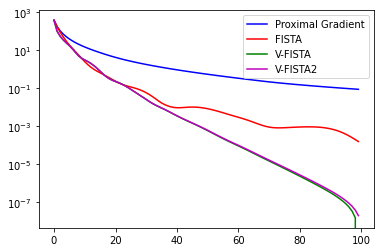

In [6]:
k = 1
sigma2 = lambda1
x4 = np.zeros(n)
y = np.zeros(n)
obj4 = np.zeros(niter)
kappa2 = L/sigma2 
sqrtkappa2 = np.sqrt(kappa2)

while k<niter+1:
    told = t
    xold = np.copy(x4) 

    x4 = soft_thresh( (L*y-A.T@(A@y-b))/(L+lambda1) , lambda2/(L+lambda1) )
    y = x4 + (sqrtkappa2-1)/(sqrtkappa2+1)*(x4-xold)

    obj4[k-1] = objfun(x4)
    k +=1

Fopt = min(np.min(obj), np.min(obj2), np.min(obj3), np.min(obj4))

plt.figure()
plt.semilogy(obj-Fopt, 'b', label='Proximal Gradient')
plt.semilogy(obj2-Fopt, 'r', label='FISTA')
plt.semilogy(obj3-Fopt, 'g', label='V-FISTA')
plt.semilogy(obj4-Fopt, 'm', label='V-FISTA2')
# plt.plot(obj-Fopt, 'b', label='Proximal Gradient')
# plt.plot(obj2-Fopt, 'r', label='FISTA')
# plt.plot(obj3-Fopt, 'g', label='V-FISTA')
# plt.plot(obj4-Fopt, 'm', label='V-FISTA2')
plt.legend()

plt.savefig('part2_ex0.pdf')
# plt.show()

print(xi[:4])
print()
print(x1[:4])
print(x2[:4])
print(x3[:4])
print(x4[:4])